Customer churn is a measure that reflects the health of your business, mainly your customer's loyalty over time.

We will use a data available on Kaggle on the following link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

If we look at the document we see that there are various columns, some are useless and others require a change (encoding) to facilitate processing

customerID is useless

In [4]:
df.drop('customerID',axis=1,inplace=True) #Delete customer ID

In [5]:
df.dtypes #Column data type

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### MonthlyCharges vs TotalCharges 

We have MonthlyCharges  float data type while TotalCharges a list! we need to change the TotalCharges to float too

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Convert TotalCharges to numeric values

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

You can't because some values have spaces, so we need to delete them

First, we will apply the same thing and ignore the error

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

we will look at only the variable who got space

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# We will supply it as index

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

We have only 11 rows here from +7000 rows, we can just drop them :)

In [12]:
#If you want to see a specific row you can use iloc 
#i is integer and loc is location

df.iloc[753]

gender                             Male
SeniorCitizen                         0
Partner                              No
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    20.25
TotalCharges                           
Churn                                No
Name: 753, dtype: object

In [13]:
#You see also directly the column Total Charges
df.iloc[753]['TotalCharges']

' '

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape
#We will drop every row that has TotalCharges = ' '

(7032, 20)

In [15]:
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
pd.to_numeric(df1.TotalCharges)
#It doesn't give any error now!

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [18]:
#Now we need to update it
df1.TotalCharges =pd.to_numeric(df1.TotalCharges)

C:\Users\JULIA\AppData\Local\Temp\ipykernel_18428\710599814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges =pd.to_numeric(df1.TotalCharges)


In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now the data type for TotalCharges is float

Let's look now at customers whoare not leaving (5163)

In [20]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Tenure is in month, it's the time the customer is engaged with the brand

# Tenure for people living and staying

In [21]:
TCN = df1[df1.Churn=='No'].tenure
TCN # We will store it in a variable

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

We will do the same thing for Yes

In [22]:
TCY = df1[df1.Churn=='Yes'].tenure
TCY

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

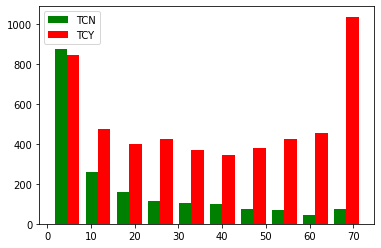

In [23]:
plt.hist([TCY,TCN], color = ['green','red'],label=['TCN','TCY'])
plt.legend()

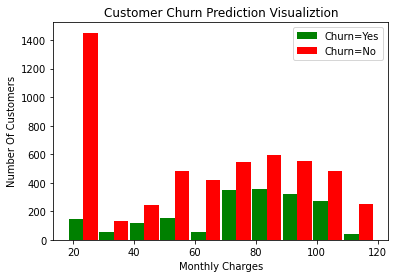

In [24]:
#For Monthly charges

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Value of each column

In [25]:
#Print all the columns
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [26]:
#Print unique values for each columns

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object': #print only categorical object
                print(f'{column}: {df[column].unique()}') #Print unique value of each column

We need to change value of some columns like yes or no one

In [27]:
print_unique_col_values(df1) #All unique values of df1

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


We need to remplace No internet service, No phone service with No

In [28]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\JULIA\AppData\Local\Temp\ipykernel_18428\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\JULIA\AppData\Local\Temp\ipykernel_18428\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [29]:
#Cleaning
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [30]:
#Remplace yes and no with 1 and 0

In [31]:
# All the columns that has yes and no
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [32]:
#Remplace Yes with 1 and No with 0
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\JULIA\AppData\Local\Temp\ipykernel_18428\1546053672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [33]:
#For gender
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()

C:\Users\JULIA\AppData\Local\Temp\ipykernel_18428\980029117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0], dtype=int64)

In [34]:
#Printing the unique values

for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


## One hot encoding for categorical columns



In [35]:
#Use OHE for categorical variables

df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns
#For every variable in column, it will create column for the variable with an output for 1 and 0

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
#Vsialiser 4 row aleatoire
#Vous pouvez voire que nous avons els columns

df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1798,0,0,0,0,35,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5963,0,0,1,1,22,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1838,0,1,0,0,54,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4512,1,1,0,0,70,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0


In [37]:
df2.dtypes
#Good, we don't have string

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Scaling

In [38]:
# Tenure, Monthly Charges and TotalCharges

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #create a variable for scaler
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) #Transform those specific columns and store it into the dataframe after transform()

In [39]:
df2.sample(1)
#You can see now that the values are scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1892,0,1,0,0,0.042254,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [40]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Model

## X and Y

In [41]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

## Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [43]:
X_train.shape

(4922, 26)

In [44]:
X_test.shape

(2110, 26)

## Build a model

In [45]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'), #Input Layers ; sme number of columns (neurons)
    keras.layers.Dense(18 , activation='relu'), #Hidden Layer
    keras.layers.Dense(1, activation='sigmoid') #Leave or stay
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 [==============================] - 3s 2ms/step - loss: 0.4942 - accuracy: 0.7562
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7972
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8005
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8066
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8068
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8100
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8086
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8082
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8125
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4033 - accura

In [46]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7716


[0.48167264461517334, 0.7715640068054199]

In [47]:
yp = model.predict(X_test)
yp[:5]

66/66 [==============================] - 0s 1ms/step


array([[0.303179  ],
       [0.50316507],
       [0.01620088],
       [0.8517897 ],
       [0.514555  ]], dtype=float32)

In [48]:
#Converting the results between 0 and 1  from 2D to 1D

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [49]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [50]:
y_test[:5]
#Wrong, True,Wrong, True, Wrong

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

Text(69.0, 0.5, 'Truth')

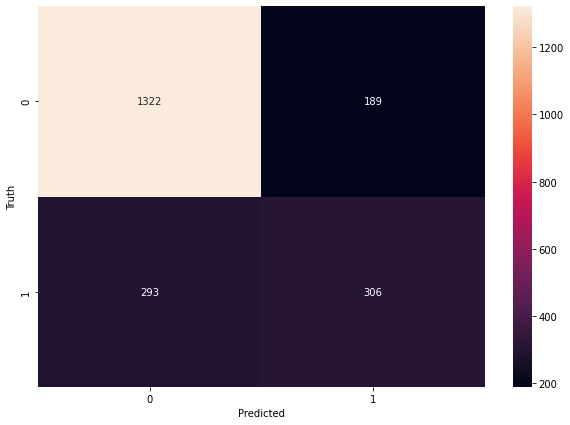

In [51]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

#Plot the performance of the model

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1511
           1       0.62      0.51      0.56       599

    accuracy                           0.77      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.76      0.77      0.76      2110



In [53]:
y_test.shape

(2110,)

## Score

In [54]:
# Accuracy f1-score

#Correct prediction (diagnoal)/ Total prediction
#,2) is two decimal places

round((1322+299)/(1322+299+189+300),2)*100

77.0

In [55]:
#Precision for 0 class. i.e. Precision for customers who did not churn
#The number of correct prediction for 0 / Total prediction of 0 (True and false)

round(1322/(1322+300),2)*100

82.0

In [56]:
#Precision for 1 class. i.e. Precision for customers who actually churned
#The number of correct prediction for 1 / Total prediction of 1 (True and false)

round(299/(299+189),2)*100

61.0

In [57]:
#Recall for 0 class
#Total of accruat prediction of 0 / (Total of accruat prediction of 0+ False prediction of 1)

round(862/(862+137),2)*100

86.0

# Handling imbalanced dataset

In the last exemple we can see that we have an imbalanced dataset, and you can clearly see the diference in the F1-Score for 0 and 1 

We need to impove the F1 score for class 1

In [95]:
import numpy as np

In [58]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

# Undersampling majority class

In [61]:
y_test.value_counts()
#You can see that we have an imbalanced dataset for classes

0    1511
1     599
Name: Churn, dtype: int64

We will try to take only 599 sample for th 1st class and train our model

In [64]:
#Count for each class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [69]:
df_class_0.shape

(5163, 27)

In [71]:
df_class_1.shape

(1869, 27)

In [62]:
#Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

In [79]:
#Select random sample for 0 class for the same count for class 1

df_class_0_under = df_class_0.sample(count_class_1)

In [80]:
df_class_0_under.shape

(1869, 27)

In [81]:
#Create a df with the merged df_class reduced and the df class 1, we merged the row
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [83]:
#You can see that now we have 3738 row
df_test_under.shape

(3738, 27)

In [90]:
# We now create X and y for this new df
X = df_test_under.drop('Churn',axis=1)
y = df_test_under['Churn']

In [91]:
#Split test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15,stratify=y)

#stratify make sure you got balanced sample for X_train and X_test (0 and 1) not all the sample are 1 or 0 or majority of the class

In [93]:
#Let's take a look at the impact of stratify

y_train.value_counts()

1    1402
0    1401
Name: Churn, dtype: int64

In [96]:
#Traning the model with new value
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.6321 - accuracy: 0.6522
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7603
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7620
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7656
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7695
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7724
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7681
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7710
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7713
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7727
Epoch 11/

You can see now that we have better f1-score for class 1 from 0.56 last time to 0.75, but we have negatively impacted the class 0 score, from 0.85 to 0.68

# Oversampling

In [98]:
count_class_0, count_class_1

(5163, 1869)

In [99]:
#We will oversample the count_class_1 , because we don't have a lot of sample!

In [102]:
#ex

df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [104]:
#We want for class 0 5163 sample as well so

df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [105]:
#Join those df

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [106]:
X = df_test_over.drop('Churn',axis=1)
y = df_test_over['Churn']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15,stratify=y)

In [108]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5393 - accuracy: 0.7319
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4848 - accuracy: 0.7707
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.7720
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7745
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.7741
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7791
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.7791
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.7797
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7840
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4587 - accura

We have here 80% for class 1 and 78% for class 2 

# SMOTE

It's like a better version of oversampling, because it's use KNN to create new sample and not only duplicate them

In [110]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [112]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [117]:
y.value_counts()

#Imbalanced value

0    5163
1    1869
Name: Churn, dtype: int64

In [118]:
from imblearn.over_sampling import SMOTE as sm

In [119]:
smote = sm(sampling_strategy='minority')

In [122]:
X_sm,y_sm = smote.fit_resample(X,y)

In [123]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.25, random_state=15,stratify=y_sm)

In [126]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5283 - accuracy: 0.7408
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4671 - accuracy: 0.7778
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.7845
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7853
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.7908
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4409 - accuracy: 0.7944
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4382 - accuracy: 0.7955
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8001
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.7993
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4252 - accura

Better results right ? 81 for class 1 and 82 for class 0

# Ensemle with undersampling

In [127]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [128]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15,stratify=y)

In [130]:
y_train.value_counts()

0    3872
1    1402
Name: Churn, dtype: int64

In [131]:
3872/1402

2.761768901569187

In [135]:
#We need approximately 3 bags
3872/3

1290.6666666666667

In [138]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [141]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [142]:
#What is the major class
df3_class0.shape, df3_class1.shape

((3872, 27), (1402, 27))

In [147]:
#df3_class0 is the major class, se we will create 3 bags

In [148]:
# We will create a function for that

In [161]:
def get_train_batch(df_majority, df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train =df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [162]:
X_train, y_train = get_train_batch(df3_class0, df3_class1,0,1402)

In [163]:
#We need 3 models , so 3 training

In [164]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.7065
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7568
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7614
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7696
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7710
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7743
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7771
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7796
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7800
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7810
Epoch 11/

In [165]:
X_train, y_train = get_train_batch(df3_class0, df3_class1,1402,2804)

In [166]:
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.6110 - accuracy: 0.6876
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7414
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7500
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 0.7521
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7553
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7557
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7550
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7621
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7611
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7589
Epoch 11/

In [167]:
X_train, y_train = get_train_batch(df3_class0, df3_class1,2084,3872)

In [168]:
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 0.6269 - accuracy: 0.6235
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7517
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7574
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7580
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7574
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7602
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7605
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7646
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7661
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4752 - accura

In [170]:
#Vote logic

vote1 = 0
vote2 = 1
vote3 = 1

vote1+vote2+vote3

2

In [172]:
len(y_pred1)

1758

In [ ]:
len(y_pred2)

In [ ]:
len(y_pred3)

In [174]:
y_pred_final = y_pred1.copy()

In [175]:
#Majority vote

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones >1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [176]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1291
           1       0.51      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.75      0.76      1758

